* Accuracy
* What is the problem?
* How to devise metrics to solve the problem?
<!-- We need Confusion Matrix to give more detailed information by  comparing predictions $y_\text{pred}$ and ground truth $y$ -->
* Aggregate Matrics based on TP, FP, TN, FN


In [1]:
from sklearn import metrics 
import numpy as np
from matplotlib import pyplot as plt
from my_ml_package.visualize import plot_cm

In [3]:
#               pred0     pred1
# actual 0       [[TN,        ],
# actual 1        [,          ]]

y =      [0, 0, 0, 0, 1, 1, 1, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1]

confusion_matrix = metrics.confusion_matrix(y, y_pred)
print(confusion_matrix)
# plot_cm(y, y_pred, labels=['0', '1'])

TP = None
TN = None
FP = None
FN = None

[[0 4]
 [0 4]]


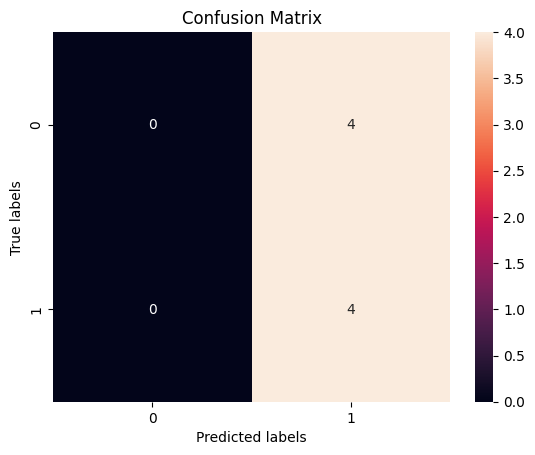

Why is the problem of the accuracy?
* Use the patient/sample-and-doctor/model analogy to understand why we need both other evaluation metrics for error analysis
* in which class of sample misclassification happen?
 


In [ ]:
# 1 represents the with-cancer class; 0 represents the without-cancer class
y =      [0, 0, 0, 0, 1, 1, 1, 1]

# the first two predictions are FP
y_pred1 = [1, 1, 0, 0, 1, 1, 1, 1]

# the first two predictions are FN
y_pred2 = [0, 0, 0, 0, 0, 0, 1, 1]

# formulate Accuracy by Confusion Matrix?
print(metrics.accuracy_score(y, y_pred1) )
print(metrics.accuracy_score(y, y_pred2) )


* [Recall and Precision](https://en.wikipedia.org/wiki/Precision_and_recall)
    + We want to correctly detect actually Covid patients, i.e., aiming to decrease FN
    + Recall $\frac{TP}{TP+FN}$  (Sensitivity or TPR): hit rate.
   
    + but also want to reflect FP: false alarm (incorrectly detecting healthy patients as having Covid)
    + Precision $\frac{TP}{TP+FP}$
    <!-- + Other metrics reflecting FP: ?? -->
    <!-- Specificity=$\frac{TN}{N}=\frac{TN}{TN+FP}$ -->
    + Opposite directions: the larger the metrics, the more FN/FP
    <!-- missing rate: $\frac{FN}{TP+FP}$ -->
    <!-- FPR=$\frac{FP}{N}=\frac{FP}{TN+FP}$

* F1: Balancing Recall and Precision


In [ ]:
# recall = TP / (TP+FN)
# precision = TP / (TP+FP)

* How we can reduce misclassification for one class of examples? 
    + we always have a tradeoff between FN and FP. since, in reality, the model will output probabilities rather than directly give the class.
*  How would reducing misclassification for one class of examples likely increase misclassification for another class of examples?



In [ ]:

# I take the demonstrated example from https://www.youtube.com/watch?v=4jRBRDbJemM&t=655s
y =      np.array([0,   0,   0,   0,   1,   1,   1,   1])
y_prob = np.array([0.5, 0.2, 0,   0,   0.5, 1,   1,   1])
y_pred = y_prob >= 0.5
print(y_pred)
print("FN", metrics.confusion_matrix(y, y_pred)[1,0])
print("FP", metrics.confusion_matrix(y, y_pred)[0,1])


* ROC (Receiver Operating Characteristic) Curve reflecting the trade-off between FN and FP 
    + True Positive Rate (TPR, i.e., recall): 1 when FN is 0
    + False Positive Rate (FPR): 0 when FP is 0; Which metric can be used to replace FPR?
    + So the best point is (FPR, TPR) = (0, 1)
    + (0, 0) is the extreme model for reducing FP
    + (1, 1) is the extreme model for reducing FN
    

In [ ]:


fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
print(thresholds)
# Calculate AUC
auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='o', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

But they have different significaces in the real world.
* In which cases we do not want people with disease midclassified as no disease, i.e., less FN?
    + life threathening scenarios, e.g., heart disease, cancer
    + disease easily causing outbreak, e.g., Covid
    
    
* In which cases we do not want healthy people misclassified as with disease, i.e., less FP
    + small problems causing unnecessary hospital cost, e.g., diarrhea

In [ ]:
# precision: how many examples are correctly predicted during all predictions for a target
# recall: how many examples are correctly predicted during all examples of one class
# F1 = 2 * (precision * recall) / (precision + recall)
print(metrics.classification_report(y, y_pred, labels=[0, 1], target_names=["zero","one"]))